In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import requests
import shutil
import time
from google.colab import files, drive
import zipfile
import imutils
import random

import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import json
import os
from tqdm.auto import tqdm
import shutil
import random
from tensorflow import keras
import glob

from pydrive.auth import GoogleAuth
from google.colab import auth

from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Creation and Extraction of Dataset

In [3]:
!ls /content/
!mkdir -p /content/datasets
!ls /content/

gdrive	sample_data
datasets  gdrive  sample_data


In [4]:
%cd /content/datasets/
!tar -xf /content/gdrive/Shareddrives/BootCamp/Proyecto/Dataset.tar.xz
!mv /content/datasets/Dataset/ /content/datasets/cervical_cancer
%cd /content/

/content/datasets
/content


## Data Indexing

In [5]:
!ls /content/datasets/cervical_cancer/

im_Dyskeratotic  im_Metaplastic  im_Superficial-Intermediate
im_Koilocytotic  im_Parabasal


In [6]:
os.listdir('/content/datasets/cervical_cancer')

['im_Parabasal',
 'im_Koilocytotic',
 'im_Metaplastic',
 'im_Superficial-Intermediate',
 'im_Dyskeratotic']

In [7]:
!ls
!mkdir datasets/images datasets/annotations

datasets  gdrive  sample_data


In [8]:
#!rm /content/datasets/annotations/*
#!rm /content/datasets/images/*

classes = ['Superficial-Intermediate', 'Parabasal', 'Metaplastic', 'Koilocytotic', 'Dyskeratotic']

### Superficial - Intermediate

In [9]:
names = glob.glob('/content/datasets/cervical_cancer/im_Superficial-Intermediate/*.bmp')
data = glob.glob('/content/datasets/cervical_cancer/im_Superficial-Intermediate/*.dat')

for elem in tqdm(names):
    # Reading image
    image = cv2.imread(elem, cv2.COLOR_BGR2RGB)

    # Obtaining image size
    sizex = image.shape[0]
    sizey = image.shape[1]

    # Resizing image and saving
    image = cv2.resize(image, (1000,1000), interpolation = cv2.INTER_AREA)
    name = elem.replace('/content/datasets/cervical_cancer/im_Superficial-Intermediate/','/content/datasets/images/sup_int-')
    name = name.replace('.bmp','.png') 

    # Aux name for annotations
    aux = name.replace('/content/datasets/images/sup_int-','')
    aux = aux.replace('.png','')
    lista = glob.glob('/content/datasets/cervical_cancer/im_Superficial-Intermediate/{}_cyt*.dat'.format(aux))

    # Creating File for Annotations
    f = open('/content/datasets/annotations/sup_int-{}.txt'.format(aux),'w+')
    
    # Reading data related to the image
    for arc in lista:
        # Obtaining data
        archivo = open(arc,'r')
        datos = archivo.read()
        splited = datos.split()

        # Converting string data to int
        dots = []
        for dot in splited:
            aux1 = dot.split(sep=',')
            dots.append(np.round(np.float32(aux1)).astype(int))
        dots = np.array(dots)
        
        # Obtaining Rectangle
        xmin = np.amin(dots[:,0])
        xmax = np.amax(dots[:,0])
        ymin = np.amin(dots[:,1])
        ymax = np.amax(dots[:,1])

        # Converting to YoloV5 data
        b_center_x = ((xmin + xmax)/2) / sizey 
        b_center_y = ((ymin + ymax)/2) / sizex
        b_width    = ((xmax - xmin)) / sizey
        b_height   = ((ymax - ymin)) / sizex

        # Line to store data
        aux2 = '{} {:.3f} {:.3f} {:.3f} {:.3f}'.format(0, b_center_x, b_center_y, b_width, b_height) + '\n'
        f.write(aux2) 

    # Closing .txt
    f.close()
    # Saving Image
    cv2.imwrite(name,image)
    

  0%|          | 0/126 [00:00<?, ?it/s]

### Parabasal

In [10]:
names = glob.glob('/content/datasets/cervical_cancer/im_Parabasal/*.bmp')
data = glob.glob('/content/datasets/cervical_cancer/im_Parabasal/*.dat')

for elem in tqdm(names):
    # Reading image
    image = cv2.imread(elem, cv2.COLOR_BGR2RGB)

    # Obtaining image size
    sizex = image.shape[0]
    sizey = image.shape[1]

    # Resizing image and saving
    image = cv2.resize(image, (1000,1000), interpolation = cv2.INTER_AREA)
    name = elem.replace('/content/datasets/cervical_cancer/im_Parabasal/','/content/datasets/images/parab-')
    name = name.replace('.bmp','.png') 

    # Aux name for annotations
    aux = name.replace('/content/datasets/images/parab-','')
    aux = aux.replace('.png','')
    lista = glob.glob('/content/datasets/cervical_cancer/im_Parabasal/{}_cyt*.dat'.format(aux))

    # Creating File for Annotations
    f = open('/content/datasets/annotations/parab-{}.txt'.format(aux),'w+')
    
    # Reading data related to the image
    for arc in lista:
        # Obtaining data
        archivo = open(arc,'r')
        datos = archivo.read()
        splited = datos.split()

        # Converting string data to int
        dots = []
        for dot in splited:
            aux1 = dot.split(sep=',')
            dots.append(np.round(np.float32(aux1)).astype(int))
        dots = np.array(dots)
        
        # Obtaining Rectangle
        xmin = np.amin(dots[:,0])
        xmax = np.amax(dots[:,0])
        ymin = np.amin(dots[:,1])
        ymax = np.amax(dots[:,1])

        # Converting to YoloV5 data
        b_center_x = ((xmin + xmax)/2) / sizey 
        b_center_y = ((ymin + ymax)/2) / sizex
        b_width    = ((xmax - xmin)) / sizey
        b_height   = ((ymax - ymin)) / sizex

        # Line to store data
        aux2 = '{} {:.3f} {:.3f} {:.3f} {:.3f}'.format(1, b_center_x, b_center_y, b_width, b_height) + '\n'
        f.write(aux2) 

    # Closing .txt
    f.close()
    # Saving Image
    cv2.imwrite(name,image)
    

  0%|          | 0/108 [00:00<?, ?it/s]

### Metaplastic

In [11]:
names = glob.glob('/content/datasets/cervical_cancer/im_Metaplastic/*.bmp')
data = glob.glob('/content/datasets/cervical_cancer/im_Metaplastic/*.dat')

for elem in tqdm(names):
    # Reading image
    image = cv2.imread(elem, cv2.COLOR_BGR2RGB)

    # Obtaining image size
    sizex = image.shape[0]
    sizey = image.shape[1]

    # Resizing image and saving
    image = cv2.resize(image, (1000,1000), interpolation = cv2.INTER_AREA)
    name = elem.replace('/content/datasets/cervical_cancer/im_Metaplastic/','/content/datasets/images/meta-')
    name = name.replace('.bmp','.png') 

    # Aux name for annotations
    aux = name.replace('/content/datasets/images/meta-','')
    aux = aux.replace('.png','')
    lista = glob.glob('/content/datasets/cervical_cancer/im_Metaplastic/{}_cyt*.dat'.format(aux))

    # Creating File for Annotations
    f = open('/content/datasets/annotations/meta-{}.txt'.format(aux),'w+')
    
    # Reading data related to the image
    for arc in lista:
        # Obtaining data
        archivo = open(arc,'r')
        datos = archivo.read()
        splited = datos.split()

        # Converting string data to int
        dots = []
        for dot in splited:
            aux1 = dot.split(sep=',')
            dots.append(np.round(np.float32(aux1)).astype(int))
        dots = np.array(dots)
        
        # Obtaining Rectangle
        xmin = np.amin(dots[:,0])
        xmax = np.amax(dots[:,0])
        ymin = np.amin(dots[:,1])
        ymax = np.amax(dots[:,1])

        # Converting to YoloV5 data
        b_center_x = ((xmin + xmax)/2) / sizey 
        b_center_y = ((ymin + ymax)/2) / sizex
        b_width    = ((xmax - xmin)) / sizey
        b_height   = ((ymax - ymin)) / sizex

        # Line to store data
        aux2 = '{} {:.3f} {:.3f} {:.3f} {:.3f}'.format(2, b_center_x, b_center_y, b_width, b_height) + '\n'
        f.write(aux2) 

    # Closing .txt
    f.close()
    # Saving Image
    cv2.imwrite(name,image)
    

  0%|          | 0/271 [00:00<?, ?it/s]

### Koilocytotic

In [12]:
names = glob.glob('/content/datasets/cervical_cancer/im_Koilocytotic/*.bmp')
data = glob.glob('/content/datasets/cervical_cancer/im_Koilocytotic/*.dat')

for elem in tqdm(names):
    # Reading image
    image = cv2.imread(elem, cv2.COLOR_BGR2RGB)

    # Obtaining image size
    sizex = image.shape[0]
    sizey = image.shape[1]

    # Resizing image and saving
    image = cv2.resize(image, (1000,1000), interpolation = cv2.INTER_AREA)
    name = elem.replace('/content/datasets/cervical_cancer/im_Koilocytotic/','/content/datasets/images/koil-')
    name = name.replace('.bmp','.png') 

    # Aux name for annotations
    aux = name.replace('/content/datasets/images/koil-','')
    aux = aux.replace('.png','')
    lista = glob.glob('/content/datasets/cervical_cancer/im_Koilocytotic/{}_cyt*.dat'.format(aux))

    # Creating File for Annotations
    f = open('/content/datasets/annotations/koil-{}.txt'.format(aux),'w+')
    
    # Reading data related to the image
    for arc in lista:
        # Obtaining data
        archivo = open(arc,'r')
        datos = archivo.read()
        splited = datos.split()

        # Converting string data to int
        dots = []
        for dot in splited:
            aux1 = dot.split(sep=',')
            dots.append(np.round(np.float32(aux1)).astype(int))
        dots = np.array(dots)
        
        # Obtaining Rectangle
        xmin = np.amin(dots[:,0])
        xmax = np.amax(dots[:,0])
        ymin = np.amin(dots[:,1])
        ymax = np.amax(dots[:,1])

        # Converting to YoloV5 data
        b_center_x = ((xmin + xmax)/2) / sizey 
        b_center_y = ((ymin + ymax)/2) / sizex
        b_width    = ((xmax - xmin)) / sizey
        b_height   = ((ymax - ymin)) / sizex

        # Line to store data
        aux2 = '{} {:.3f} {:.3f} {:.3f} {:.3f}'.format(3, b_center_x, b_center_y, b_width, b_height) + '\n'
        f.write(aux2) 

    # Closing .txt
    f.close()
    # Saving Image
    cv2.imwrite(name,image)
    

  0%|          | 0/238 [00:00<?, ?it/s]

### Dyskeratotic

In [13]:
names = glob.glob('/content/datasets/cervical_cancer/im_Dyskeratotic/*.bmp')
data = glob.glob('/content/datasets/cervical_cancer/im_Dyskeratotic/*.dat')

for elem in tqdm(names):
    # Reading image
    image = cv2.imread(elem, cv2.COLOR_BGR2RGB)

    # Obtaining image size
    sizex = image.shape[0]
    sizey = image.shape[1]

    # Resizing image and saving
    image = cv2.resize(image, (1000,1000), interpolation = cv2.INTER_AREA)
    name = elem.replace('/content/datasets/cervical_cancer/im_Dyskeratotic/','/content/datasets/images/disk-')
    name = name.replace('.bmp','.png') 

    # Aux name for annotations
    aux = name.replace('/content/datasets/images/disk-','')
    aux = aux.replace('.png','')
    lista = glob.glob('/content/datasets/cervical_cancer/im_Dyskeratotic/{}_cyt*.dat'.format(aux))

    # Creating File for Annotations
    f = open('/content/datasets/annotations/disk-{}.txt'.format(aux),'w+')
    
    # Reading data related to the image
    for arc in lista:
        # Obtaining data
        archivo = open(arc,'r')
        datos = archivo.read()
        splited = datos.split()

        # Converting string data to int
        dots = []
        for dot in splited:
            aux1 = dot.split(sep=',')
            dots.append(np.round(np.float32(aux1)).astype(int))
        dots = np.array(dots)
        
        # Obtaining Rectangle
        xmin = np.amin(dots[:,0])
        xmax = np.amax(dots[:,0])
        ymin = np.amin(dots[:,1])
        ymax = np.amax(dots[:,1])

        # Converting to YoloV5 data
        b_center_x = ((xmin + xmax)/2) / sizey 
        b_center_y = ((ymin + ymax)/2) / sizex
        b_width    = ((xmax - xmin)) / sizey
        b_height   = ((ymax - ymin)) / sizex

        # Line to store data
        aux2 = '{} {:.3f} {:.3f} {:.3f} {:.3f}'.format(4, b_center_x, b_center_y, b_width, b_height) + '\n'
        f.write(aux2) 

    # Closing .txt
    f.close()
    # Saving Image
    cv2.imwrite(name,image)
    

  0%|          | 0/223 [00:00<?, ?it/s]

In [14]:
!rm -r /content/datasets/cervical_cancer
!mv /content/datasets/annotations/ /content/datasets/labels/

## Sample Data

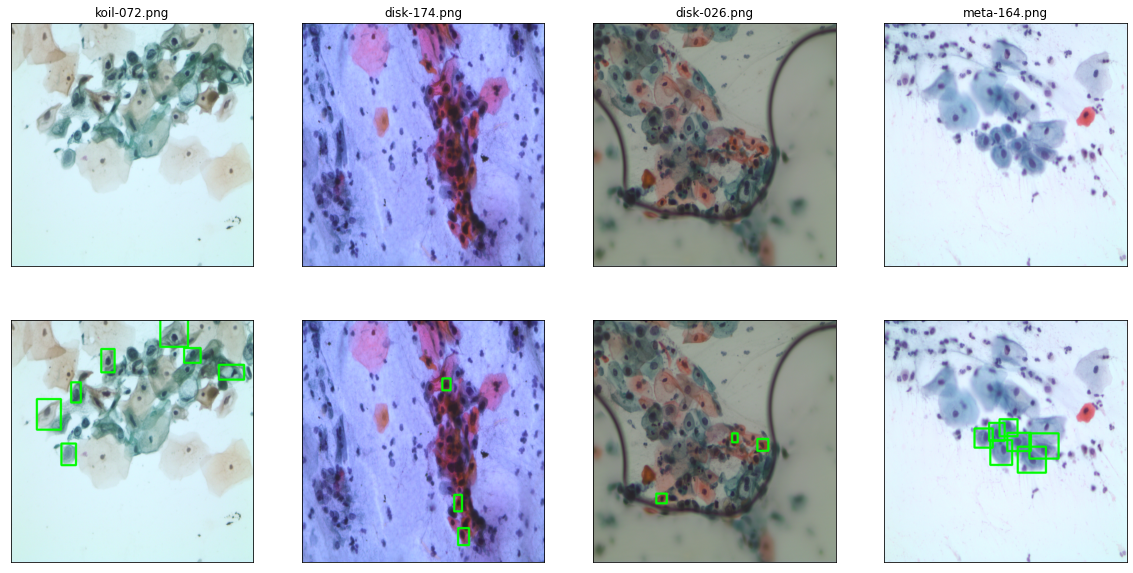

In [15]:
images = glob.glob('/content/datasets/images/*.png')

fig = plt.figure(figsize=(20, 10))
for i in range(4):
    # Choosing images
    name = random.choice(images)
    image = mpimg.imread(name)
    rect = np.copy(image)

    # Reading data
    dat = name.replace('/content/datasets/images/','/content/datasets/labels/')
    dat = dat.replace('.png','.txt')
    archivo = open(dat,'r')
    datos = archivo.read()
    splited = datos.split()
    reshaped = np.reshape(np.array(splited).astype(float),(int(len(splited)/5),5))
    
    # Drawing rectangles
    for vec in reshaped:
        xmin = int(vec[1]*image.shape[1] - vec[3]*image.shape[1]/2)
        ymin = int(vec[2]*image.shape[0] - vec[4]*image.shape[0]/2)
        xmax = int(vec[1]*image.shape[1] + vec[3]*image.shape[1]/2)
        ymax = int(vec[2]*image.shape[0] + vec[4]*image.shape[0]/2)

        cv2.rectangle(rect, (xmin,ymin), (xmax,ymax), (0,.99,0,1), 8)
    
    # Plotting Original Images
    ax1 = fig.add_subplot(2,4,i+1, xticks=[], yticks=[])
    ax1.imshow(np.squeeze(image))
    ax1.set_title(name.replace('/content/datasets/images/',''))
    # Plotting Original Images
    ax2 = fig.add_subplot(2,4,(i+1)+4, xticks=[], yticks=[])
    ax2.imshow(np.squeeze(rect))

## Dividing Data

In [16]:
# Read images and annotations
images = [os.path.join('/content/datasets/images', x) for x in os.listdir('/content/datasets/images')]
annotations = [os.path.join('/content/datasets/labels', x) for x in os.listdir('/content/datasets/labels') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 42)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.05, random_state = 42)

In [17]:
print('Train: ', len(train_images), ' - ', len(train_annotations))
print('Valid: ', len(val_images), ' - ', len(val_annotations))
print('Test: ', len(test_images), ' - ', len(test_annotations))

Train:  772  -  772
Valid:  184  -  184
Test:  10  -  10


In [18]:
!mkdir -p /content/dataset/images/train /content/dataset/images/val /content/dataset/images/test /content/dataset/labels/train /content/dataset/labels/val /content/dataset/labels/test

In [19]:
def move_files(files, folder):
    for file in tqdm(files):
        try:
            shutil.move(file, folder)
        except:
            print(file)
            assert False

# Move the splits into their folders
move_files(train_images, '/content/dataset/images/train/')
move_files(val_images, '/content/dataset/images/val/')
move_files(test_images, '/content/dataset/images/test/')
move_files(train_annotations, '/content/dataset/labels/train/')
move_files(val_annotations, '/content/dataset/labels/val/')
move_files(test_annotations, '/content/dataset/labels/test/')

  0%|          | 0/772 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/772 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [20]:
!rm -r /content/datasets
!mkdir /content/dataset/train /content/dataset/valid /content/dataset/test

In [21]:
!mkdir /content/dataset/test/images /content/dataset/test/labels
!mkdir /content/dataset/train/images /content/dataset/train/labels
!mkdir /content/dataset/valid/images /content/dataset/valid/labels

In [22]:
!mv /content/dataset/images/test/* /content/dataset/test/images/
!mv /content/dataset/images/train/* /content/dataset/train/images/
!mv /content/dataset/images/val/* /content/dataset/valid/images/

!mv /content/dataset/labels/test/* /content/dataset/test/labels/
!mv /content/dataset/labels/train/* /content/dataset/train/labels/
!mv /content/dataset/labels/val/* /content/dataset/valid/labels/

In [23]:
!rm -r /content/dataset/images /content/dataset/labels

## Saving the new-data

In [24]:
!tar -czvf dataset_YOLOV5.tar.gz /content/dataset

tar: Removing leading `/' from member names
/content/dataset/
/content/dataset/train/
/content/dataset/train/images/
/content/dataset/train/images/parab-107.png
/content/dataset/train/images/disk-173.png
/content/dataset/train/images/koil-195.png
/content/dataset/train/images/parab-079.png
/content/dataset/train/images/sup_int-035.png
/content/dataset/train/images/meta-046.png
/content/dataset/train/images/sup_int-075.png
/content/dataset/train/images/koil-182.png
/content/dataset/train/images/koil-184.png
/content/dataset/train/images/disk-201.png
/content/dataset/train/images/koil-150.png
/content/dataset/train/images/koil-127.png
/content/dataset/train/images/parab-009.png
/content/dataset/train/images/meta-009.png
/content/dataset/train/images/meta-249.png
/content/dataset/train/images/meta-266.png
/content/dataset/train/images/disk-072.png
/content/dataset/train/images/parab-098.png
/content/dataset/train/images/disk-141.png
/content/dataset/train/images/meta-042.png
/content/data

In [25]:
!cp "/content/dataset_YOLOV5.tar.gz" "/content/gdrive/Shareddrives/BootCamp/Proyecto"